In [14]:
#import requuired libraries
import pandas as pd
import numpy as np
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
# Splitting the data to input data and output data
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest

In [5]:
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [6]:
sfs = SFS(rfc, forward=True, floating=True, k_features=16)

In [7]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=8,
                                                           n_estimators=201,
                                                           random_state=42),
                          floating=True, k_features=(16, 16),
                          scoring='accuracy')

In [8]:
sfs.k_feature_names_

('X0',
 'Y0',
 'Z0',
 'X1',
 'Y1',
 'Z1',
 'X2',
 'X3',
 'Z4',
 'Z8',
 'X9',
 'Y9',
 'Z9',
 'X10',
 'Y10',
 'Z10')

In [9]:
x_train_feat = X_train[list(sfs.k_feature_names_)]
x_test_feat = X_test[list(sfs.k_feature_names_)]

In [10]:
rfc.fit(x_train_feat, y_train)

RandomForestClassifier(max_depth=8, n_estimators=201, random_state=42)

In [11]:
y_pred_rfc = rfc.predict(x_test_feat)

In [12]:
print("Accuracy for Random Forest for test data",accuracy_score(y_test,y_pred_rfc))

Accuracy for Random Forest for test data 0.9912074779119894


In [13]:
#Classification report for the training data
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.97      0.99      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.99      0.97      0.98      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [14]:
# Confusion matrix for testing data
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix(y_test, y_pred_rfc))

[[4881   16    0    0    1]
 [   0 4441    0    0   44]
 [   0    0 4854    0    0]
 [   0    0    0 4496    0]
 [   0  145    0    0 4551]]


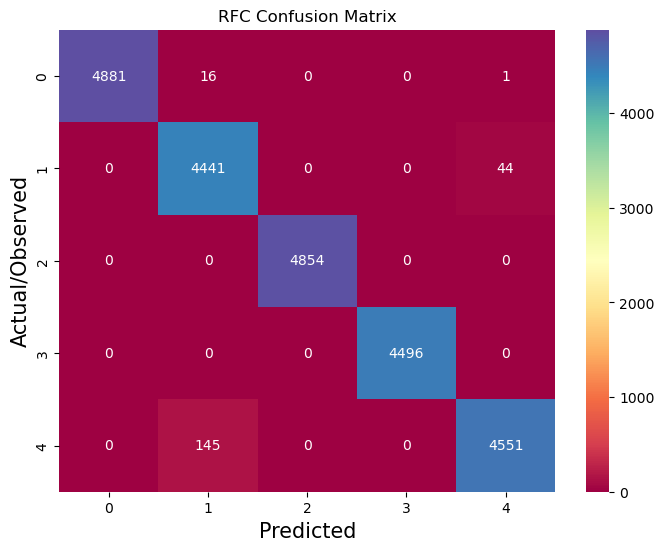

In [17]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_rfc, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Multi Layer Perceptron

In [5]:
# Importing the deep learning model
from sklearn.neural_network import MLPClassifier

In [16]:
mlp = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)

In [17]:
x_train_feat_mlp = X_train[list(('X0','Y0','Z0','X1','Y1','Z1','X2','X3','Z4','Z8','X9','Y9','Z9','X10','Y10','Z10'))]
x_test_feat_mlp = X_test[list(('X0','Y0','Z0','X1','Y1','Z1','X2','X3','Z4','Z8','X9','Y9','Z9','X10','Y10','Z10'))]

In [18]:
mlp.fit(x_train_feat_mlp, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=1000, learning_rate='adaptive')

In [19]:
y_pred_mlp  = mlp.predict(x_test_feat_mlp)

In [20]:
acc_mlp = accuracy_score(y_test,y_pred_mlp)
print(f" The testing data accuracy for the best model is {acc_mlp}")

 The testing data accuracy for the best model is 0.9886892312945494


In [21]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.96      0.98      0.97      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.98      0.97      0.97      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [22]:
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_mlp

array([[4878,   16,    0,    0,    4],
       [   4, 4394,    1,    1,   85],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4495,    1],
       [   0,  153,    0,    0, 4543]], dtype=int64)

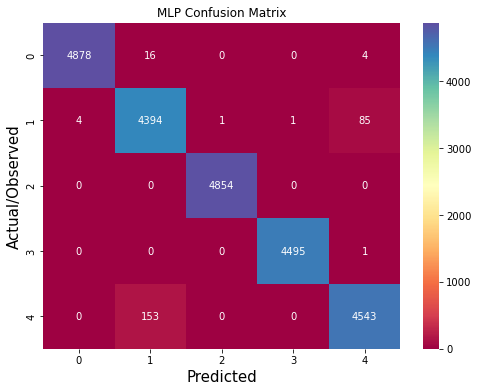

In [23]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_mlp, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("MLP Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);